# Setup

## Imports

In [14]:
import magnet as mag

In [1]:
import torch

In [18]:
from captioner import hparams
from captioner.nlp import get_nlp
from captioner.hparams import (vocab_size, caption_idx, shuffle, hidden_size,
                               num_layers, rnn_type, learning_rate,
                               iterations, epochs, save_every, write_every)
from captioner.data import get_training_dataloaders
from captioner.model import Model
from captioner.train import optimize

## Preparations

In [3]:
jtplot_style()

In [4]:
DIR_DATA /= 'COCO'
DIR_CHECKPOINTS = DIR_MAIN / 'checkpoints'

## Get SpaCy Ready

In [5]:
nlp = get_nlp('en_core_web_lg', vocab_size, DIR_CHECKPOINTS / 'vocab')

In [6]:
embedding_dim = nlp.vocab.vectors.shape[1]

## Load Data

In [7]:
dataloader = get_training_dataloaders(DIR_DATA, caption_idx, shuffle)

loading annotations into memory...
Done (t=1.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.27s)
creating index...
index created!


In [8]:
x = next(iter(dataloader['val']))

In [9]:
feature_dim = x[0].shape[1]

# Create Model

In [15]:
model = Model(feature_dim, embedding_dim, hidden_size,
              num_layers, rnn_type, vocab_size)

if (DIR_CHECKPOINTS / 'model.pt').exists():
    model.load_state_dict(torch.load(DIR_CHECKPOINTS / 'model.pt', map_location=mag.device))

# Train

In [16]:
optimizer = hparams.optimizer(model.parameters(), learning_rate)
if (DIR_CHECKPOINTS / 'optimizer.pt').exists():
    optimizer.load_state_dict(torch.load(DIR_CHECKPOINTS / 'optimizer.pt',
                                         map_location=mag.device))

In [17]:
history = {'iterations': 0, 'loss': [], 'val_loss': []}

In [ ]:
optimize(model, optimizer, history, dataloader, nlp, vocab_size, DIR_CHECKPOINTS,
        epochs, iterations, save_every, write_every)

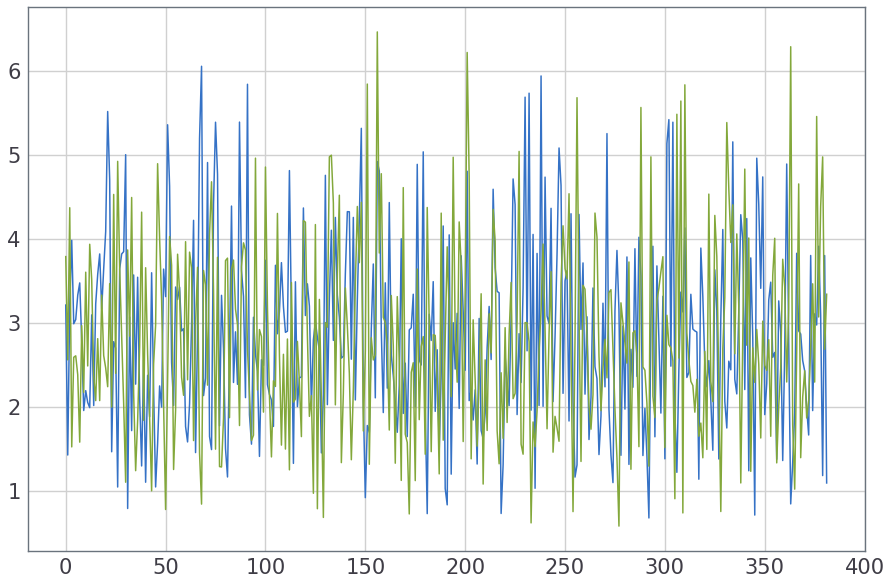

In [16]:
plot(history['loss'], label='loss')
plot(history['val_loss'], label='val_loss')

In [ ]:
plot(np.exp(np.array(history['loss'])), label='perplexity')
plot(np.exp(np.array(history['val_loss'])), label='val_perplexity')